In [8]:
import pandas as pd
import torch

planet_id = 785834
f_signal = pd.read_parquet(f'Data/ariel-data-challenge-2024/train/{planet_id}/FGS1_signal.parquet')
a_signal = pd.read_parquet(f'Data/ariel-data-challenge-2024/train/{planet_id}/AIRS-CH0_signal.parquet')
torch.tensor(f_signal.values)

tensor([[273, 271, 284,  ..., 255, 285, 289],
        [282, 290, 287,  ..., 304, 300, 296],
        [296, 275, 279,  ..., 314, 281, 289],
        ...,
        [306, 294, 297,  ..., 305, 294, 283],
        [284, 289, 294,  ..., 290, 280, 294],
        [268, 287, 306,  ..., 251, 280, 273]], dtype=torch.uint16)

In [1]:
from urllib.request import urlopen
from PIL import Image
import timm
import models.efficientformer_v2

img = Image.open(
    urlopen('https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'))

model = timm.create_model(
    'efficientformerv2_s0.snap_dist_in1k',
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
)
model = model.eval()

data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

c:\Users\siddh\Desktop\deep\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\models\efficientformer_v2.py:692: UserWarning: Overwriting efficientformerv2_s0 in registry with models.efficientformer_v2.efficientformerv2_s0. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def efficientformerv2_s0(pretrained=False, **kwargs) -> EfficientFormerV2:
c:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\models\efficientformer_v2.py:704: UserWarning: Overwriting efficientformerv2_s1 in registry with models.efficientformer_v2.efficientformerv2_s1. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def efficientformerv2_s1(pretrained=Fals

RuntimeError: Given groups=1, weight of size [16, 1, 3, 3], expected input[1, 3, 224, 224] to have 1 channels, but got 3 channels instead

In [2]:
model

EfficientFormerV2(
  (stem): Stem4(
    (conv1): ConvNormAct(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn): BatchNormAct2d(
        16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): GELU()
      )
    )
    (conv2): ConvNormAct(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (bn): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): GELU()
      )
    )
  )
  (stages): Sequential(
    (0): EfficientFormerV2Stage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): EfficientFormerV2Block(
          (mlp): ConvMlpWithNorm(
            (fc1): ConvNormAct(
              (conv): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
              (bn): BatchNormAct2d(
                128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
     

In [10]:
print(f'FGS1 shape {f_signal.to_numpy().shape}\nAIRS-CH0 shape {a_signal.to_numpy().shape}')

FGS1 shape (135000, 1024)
AIRS-CH0 shape (11250, 11392)


In [14]:
pd.read_parquet(f'Data/ariel-data-challenge-2024/train/{planet_id}/FGS1_calibration/dark.parquet').to_numpy().shape

(32, 32)

In [13]:
import math
math.sqrt(11250)

106.06601717798213

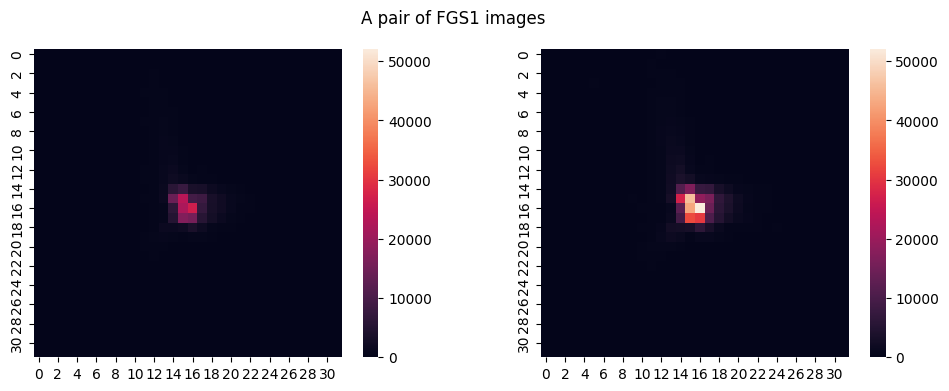

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(f_signal.iloc[0].values.reshape(32, 32), ax=ax1, vmin=0, vmax=52000)
ax1.set_aspect('equal')
sns.heatmap(f_signal.iloc[1].values.reshape(32, 32), ax=ax2, vmin=0, vmax=52000)
ax2.set_aspect('equal')
plt.suptitle('A pair of FGS1 images')
plt.show()

In [1]:
from torch.utils.data import DataLoader
import dataloader

train_data = dataloader.CustomDataset("D:/Data/train", "D:/Data/train_labels.csv")
train_loader = DataLoader(train_data, batch_size= 1)

train_data[0]

(tensor([[701, 730, 709,  ..., 738, 723, 710],
         [710, 712, 711,  ..., 718, 715, 735],
         [712, 721, 695,  ..., 708, 720, 724],
         ...,
         [711, 702, 726,  ..., 729, 728, 719],
         [739, 717, 710,  ..., 732, 705, 725],
         [726, 730, 717,  ..., 727, 725, 714]], dtype=torch.uint16),
 tensor([[273, 271, 284,  ..., 255, 285, 289],
         [282, 290, 287,  ..., 304, 300, 296],
         [296, 275, 279,  ..., 314, 281, 289],
         ...,
         [306, 294, 297,  ..., 305, 294, 283],
         [284, 289, 294,  ..., 290, 280, 294],
         [268, 287, 306,  ..., 251, 280, 273]], dtype=torch.uint16),
 0,
 'D:/Data/train\\785834\\AIRS-CH0_signal.parquet')

In [8]:
from torch.utils.data import DataLoader
import dataloader

train_data = dataloader.CustomDataset("D:/Data/train", "D:/Data/train_labels.csv")
train_loader = DataLoader(train_data, batch_size= 1)

for data in train_loader:
    print(data)
    break

[tensor([[[1313, 1282, 1248,  ..., 1252, 1272, 1304],
         [1277, 1305, 1334,  ..., 1299, 1291, 1280],
         [1290, 1268, 1279,  ..., 1274, 1262, 1291],
         ...,
         [1291, 1282, 1308,  ..., 1287, 1307, 1297],
         [1289, 1300, 1272,  ..., 1295, 1299, 1318],
         [1303, 1269, 1262,  ..., 1321, 1280, 1298]]], dtype=torch.uint16), tensor([[[359, 335, 346,  ..., 354, 375, 355],
         [339, 352, 367,  ..., 355, 354, 365],
         [338, 342, 344,  ..., 336, 334, 374],
         ...,
         [363, 338, 324,  ..., 260, 345, 348],
         [360, 358, 316,  ..., 366, 338, 351],
         [374, 326, 387,  ..., 327, 345, 335]]], dtype=torch.uint16), tensor([0])]


In [21]:
df = pd.read_csv(r'C:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\Data\ariel-data-challenge-2024\train_adc_info.csv')

In [22]:
df.loc[df['planet_id'] == planet_id]

,planet_id,FGS1_adc_offset,FGS1_adc_gain,AIRS-CH0_adc_offset,AIRS-CH0_adc_gain,star
0,785834,-343.335938,0.837244,-778.916533,0.924746,1


In [54]:
from torch.utils.data import Dataset
import os
from natsort import natsorted
import numpy as np
import preprocessing.utils
import pandas as pd

class CustomDataset(Dataset):
    def __init__(self, root, flag, split, a_transform=None, f_transform=None):
        super().__init__()
        self.f_data = []
        self.a_data = []
        self.a_transform = a_transform
        self.f_transform = f_transform
        self.root_dir = root
        self.cut_inf, self.cut_sup = 39, 321
        self.files = natsorted(os.listdir(os.path.join(self.root_dir, split)))
        self.adc = pd.read_csv(os.path.join(root, f'{split}_adc_info.csv'))
        axis = pd.read_parquet(os.path.join(self.root_dir, 'axis_info.parquet'))
        self.integration_airs = axis['AIRS-CH0-integration_time'].dropna().values
        self.integration_fgs1 = np.ones(axis.shape[0]) * 0.1
        self.flag = flag
        self.split = split

        if self.split == "train":
            self.labels = pd.read_csv(os.path.join(root, f'{split}_labels.csv'))

        for planet in self.files:
            self.a_data.append((os.path.join(self.root_dir, split, planet, "AIRS-CH0_signal.parquet"), int(planet)))
            self.f_data.append((os.path.join(self.root_dir, split, planet, "FGS1_signal.parquet"), int(planet)))

    def __len__(self):
        return len(self.a_data)  # Assuming both AIRS and FGS1 data have the same length

    def __getitem__(self, index):
        AIRS_data_path, a_planet = self.a_data[index]
        FGS1_data_path, f_planet = self.f_data[index]

        AIRS_data = pd.read_parquet(AIRS_data_path)
        FGS1_data = pd.read_parquet(FGS1_data_path)
        
        AIRS_data = AIRS_data.values.astype(np.float64).reshape((AIRS_data.shape[0], 32, 356))
        FGS1_data = FGS1_data.values.astype(np.float64).reshape((FGS1_data.shape[0], 32, 32))

        adc_info = self.adc.loc[self.adc['planet_id'] == a_planet].iloc[0]
        print('before ACD')
        AIRS_data = preprocessing.utils.adc_convert(
            AIRS_data,
            float(adc_info['AIRS-CH0_adc_gain']),
            float(adc_info['AIRS-CH0_adc_offset'])
        )
        FGS1_data = preprocessing.utils.adc_convert(
            FGS1_data,
            float(adc_info['FGS1_adc_gain']),
            float(adc_info['FGS1_adc_offset'])
        )
        print('AFTER ACD')

        AIRS_data = AIRS_data[:, :, self.cut_inf:self.cut_sup]

        calibration_files = {
            'flat': 'flat.parquet',
            'dark': 'dark.parquet',
            'dead': 'dead.parquet',
            'linear_corr': 'linear_corr.parquet'
        }

        def load_calibration_data(planet_id, calibration_type, cut_range=None):
            path = os.path.join(self.root_dir, f'{self.split}/{planet_id}/AIRS-CH0_calibration/{calibration_files[calibration_type]}')
            data = pd.read_parquet(path).values.astype(np.float64)
            if cut_range:
                data = data[:, cut_range[0]:cut_range[1]]
            return data

        flat_airs = load_calibration_data(a_planet, 'flat', (self.cut_inf, self.cut_sup))
        dark_airs = load_calibration_data(a_planet, 'dark', (self.cut_inf, self.cut_sup))
        dead_airs = load_calibration_data(a_planet, 'dead', (self.cut_inf, self.cut_sup))
        linear_corr_airs = load_calibration_data(a_planet, 'linear_corr', (self.cut_inf, self.cut_sup))

        flat_fgs1 = load_calibration_data(f_planet, 'flat')
        dark_fgs1 = load_calibration_data(f_planet, 'dark')
        dead_fgs1 = load_calibration_data(f_planet, 'dead')
        linear_corr_fgs1 = load_calibration_data(f_planet, 'linear_corr')

        if self.flag['MASK']:
            print('are We going in ?')
            AIRS_data = preprocessing.utils.mask_hot_dead(AIRS_data, dead_airs, dark_airs)
            FGS1_data = preprocessing.utils.mask_hot_dead(FGS1_data, dead_fgs1, dark_fgs1)
            print('applied mask')
        if self.flag["NLCORR"]:
            AIRS_data = preprocessing.utils.apply_linear_corr(linear_corr_airs, AIRS_data)
            FGS1_data = preprocessing.utils.apply_linear_corr(linear_corr_fgs1, FGS1_data)
            print('applied linear correction')

        if self.flag["DARK"]:
            AIRS_data = preprocessing.utils.clean_dark(AIRS_data, dead_airs, dark_airs, self.integration_airs)
            FGS1_data = preprocessing.utils.clean_dark(FGS1_data, dead_fgs1, dark_fgs1, self.integration_fgs1)
            print('corrected dark current')

        AIRS_data = preprocessing.utils.get_cds(AIRS_data)
        FGS1_data = preprocessing.utils.get_cds(FGS1_data)

        if self.a_transform:
            AIRS_data = self.a_transform(AIRS_data)
        if self.f_transform:
            FGS1_data = self.f_transform(FGS1_data)

        if self.flag["TIME_BINNING"]:
            AIRS_data = preprocessing.utils.bin_obs(AIRS_data, binning=30)
            FGS1_data = preprocessing.utils.bin_obs(FGS1_data, binning=30 * 12)
            print('done binning')
        else:
            AIRS_data = AIRS_data.transpose(0, 2, 1)
            FGS1_data = FGS1_data.transpose(0, 2, 1)

        if self.flag["FLAT"]:
            AIRS_data = preprocessing.utils.correct_flat_field(flat_airs, dead_airs, AIRS_data)
            FGS1_data = preprocessing.utils.correct_flat_field(flat_fgs1, dead_fgs1, FGS1_data)
            print('flat')

        if self.split == "train":
            label = self.labels[self.labels['planet_id'] == a_planet]['value'].values[0]
            data = (AIRS_data, FGS1_data, label)
            print('made data')
        else:  # For test split
            data = (AIRS_data, FGS1_data)

        return data


In [2]:
import torch

In [8]:
data = torch.load(r'C:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\preprocessed\785834\FGS1.pth')

In [9]:
data.shape

torch.Size([187, 32, 32])

In [25]:
import os
len(os.listdir(r'C:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\preprocessed'))

673

In [55]:
data = CustomDataset(r'Data/ariel-data-challenge-2024',{'MASK':True,'NLCORR':True,'DARK':True,'TIME_BINNING':True,'FLAT':True},split="train")

In [56]:
for i,j,k in data:
    print(i.shape)
    break

before ACD
AFTER ACD
are We going in ?


NameError: name 'i' is not defined

In [23]:
pd.read_parquet(r'C:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\Data\ariel-data-challenge-2024\axis_info.parquet')

,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
0,0.000028,4.078463,0.1,0.000028
1,0.000056,4.074023,4.5,0.000056
2,0.001361,4.069568,0.1,0.000139
3,0.001389,4.065100,4.5,0.000167
4,0.002694,4.060618,0.1,0.000250
...,...,...,...,...
134995,NaN,NaN,NaN,7.499722
134996,NaN,NaN,NaN,7.499806
134997,NaN,NaN,NaN,7.499833
134998,NaN,NaN,NaN,7.499917


In [33]:
planet_id = 14485303
f_signal = pd.read_parquet(f'data/ariel-data-challenge-2024/train/{planet_id}/FGS1_signal.parquet')
f_signal.shape

(135000, 1024)

In [26]:
mean_signal = f_signal.values.mean(axis=1)
net_signal = mean_signal[1::2] - mean_signal[0::2]
cum_signal = net_signal.cumsum()

In [39]:
pd.read_parquet(r'C:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\Data\ariel-data-challenge-2024\train\785834\FGS1_calibration\read.parquet')

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31
0,13.447132,13.037364,13.320732,13.934092,14.160968,12.997231,13.605174,13.179105,13.031221,13.514571,...,12.830434,13.167031,12.889489,13.446304,13.519172,13.556801,13.398178,12.817820,12.855377,13.383958
1,12.799192,15.720345,12.893337,13.209815,13.018760,12.853811,14.092373,28.917124,14.327434,12.952086,...,13.051660,13.315811,12.645670,13.236526,12.655067,13.625855,15.532673,13.316868,13.065052,13.007496
2,14.011855,14.344862,13.188338,14.408124,13.020654,13.505918,12.732587,12.829406,12.820350,13.804098,...,13.279897,13.659994,12.731043,14.440821,13.113338,12.870840,13.968151,15.748286,13.902305,12.735503
3,13.223301,13.600391,12.934800,17.042988,15.969407,46.141069,13.909606,13.255826,14.416834,12.676454,...,12.976551,12.928398,13.247288,13.112748,13.768122,13.077388,13.206464,12.941768,13.240524,12.603768
4,12.462461,32.868870,13.565033,12.948105,13.117695,13.190062,13.625904,12.907982,14.176126,14.645302,...,13.271953,13.048486,14.321457,17.067648,13.212197,13.434782,13.049322,13.067504,12.892875,12.835842
5,13.029042,20.261400,13.222501,13.414526,13.265013,13.911818,13.364908,13.694575,12.849393,12.926298,...,13.101895,14.444280,12.707569,15.358972,18.928262,13.020566,13.191545,13.343338,13.207074,12.902596
6,13.288539,17.563226,13.203073,14.250993,16.465606,13.475710,13.174175,13.166318,13.590350,13.119641,...,12.936764,17.106738,13.071521,13.183591,13.152070,15.829402,12.605497,16.573056,13.396213,13.353961
7,13.698956,12.809229,13.616637,13.576106,13.425336,12.761027,14.480694,13.610478,13.357413,13.475321,...,14.503129,12.979057,13.687640,13.118037,33.735586,13.335105,13.800307,13.748396,15.201048,13.346287
8,14.219683,13.933556,13.126639,13.369487,13.163664,12.818119,13.740463,12.767789,32.232798,12.942297,...,13.261890,12.887265,13.089404,12.941111,13.672106,13.989907,13.435668,14.519015,13.414396,14.830492
9,17.730966,14.513986,13.172437,13.306472,13.168511,13.681521,13.686925,13.351959,13.185653,13.718821,...,12.822205,18.150157,13.196600,12.743566,13.133077,13.299443,14.267770,13.101010,14.140303,13.500263


In [32]:
cum_signal.shape

(67500,)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\siddh\Desktop\deep\Ariel-Data-Challenge-2024\Data\ariel-data-challenge-2024\train_labels.csv')

In [3]:
df.head()

,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,785834,0.001086,0.001137,0.001131,0.001124,0.001138,0.001131,0.001123,0.001127,0.001120,...,0.001075,0.001076,0.001076,0.001076,0.001074,0.001073,0.001072,0.001073,0.001073,0.001072
1,14485303,0.001835,0.001835,0.001834,0.001833,0.001833,0.001833,0.001833,0.001834,0.001834,...,0.001893,0.001892,0.001892,0.001891,0.001891,0.001891,0.001890,0.001890,0.001889,0.001888
2,17002355,0.002792,0.002814,0.002808,0.002804,0.002809,0.002805,0.002802,0.002805,0.002801,...,0.002784,0.002783,0.002783,0.002783,0.002783,0.002784,0.002784,0.002785,0.002785,0.002784
3,24135240,0.001294,0.001308,0.001308,0.001306,0.001306,0.001303,0.001306,0.001314,0.001314,...,0.001405,0.001404,0.001403,0.001402,0.001401,0.001400,0.001399,0.001397,0.001395,0.001393
4,25070640,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,...,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988


In [6]:
wl_1 = df['wl_1']

(array([143., 164., 112.,  57.,  40.,  38.,  31.,  45.,  29.,  14.]),
 array([0.00039627, 0.0010663 , 0.00173633, 0.00240636, 0.00307639,
        0.00374642, 0.00441645, 0.00508647, 0.0057565 , 0.00642653,
        0.00709656]),
 <BarContainer object of 10 artists>)

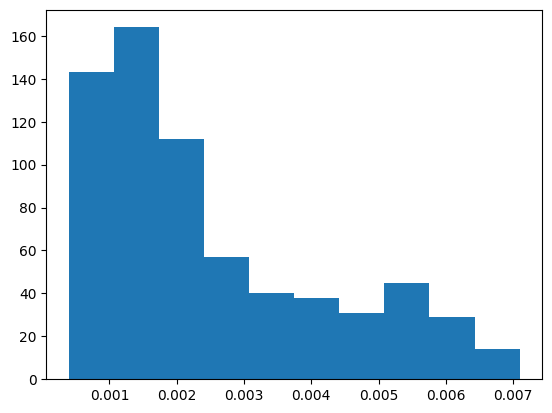

In [7]:
plt.hist(wl_1)

In [8]:
df.describe()

,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
count,6.730000e+02,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,...,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,2.131767e+09,0.002486,0.002516,0.002510,0.002505,0.002507,0.002499,0.002499,0.002508,0.002505,...,0.002513,0.002513,0.002512,0.002512,0.002512,0.002513,0.002513,0.002512,0.002511,0.002510
std,1.200253e+09,0.001720,0.001720,0.001717,0.001717,0.001715,0.001713,0.001714,0.001716,0.001716,...,0.001721,0.001721,0.001721,0.001721,0.001721,0.001722,0.001722,0.001722,0.001722,0.001721
min,7.858340e+05,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,0.000396,...,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397
25%,1.121250e+09,0.001183,0.001206,0.001206,0.001206,0.001206,0.001206,0.001206,0.001206,0.001206,...,0.001207,0.001207,0.001206,0.001206,0.001206,0.001206,0.001206,0.001206,0.001206,0.001206
50%,2.042817e+09,0.001866,0.001905,0.001896,0.001894,0.001896,0.001894,0.001886,0.001896,0.001895,...,0.001897,0.001897,0.001896,0.001896,0.001896,0.001897,0.001897,0.001897,0.001897,0.001896
75%,3.101987e+09,0.003527,0.003533,0.003530,0.003529,0.003528,0.003527,0.003529,0.003532,0.003532,...,0.003529,0.003529,0.003529,0.003529,0.003529,0.003529,0.003529,0.003529,0.003529,0.003528
max,4.286134e+09,0.007097,0.007080,0.007077,0.007072,0.007071,0.007069,0.007070,0.007072,0.007071,...,0.007233,0.007227,0.007222,0.007223,0.007231,0.007238,0.007239,0.007233,0.007224,0.007217
